In [108]:
import zipfile
import os
import pandas as pd


def extract_data(zip_file_path, extracted_dir):
    
    data = []
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_dir)
        print(f"Dateien aus {zip_file_path} erfolgreich extrahiert.")

        
        txt_files = [f for f in os.listdir(extracted_dir) if f.endswith('.txt')]

        
        for txt_file in txt_files:
            with open(os.path.join(extracted_dir, txt_file), 'r', encoding='utf-8') as file:
                text = file.read()
                data.append(text)

    except Exception as e:
        print(f"Fehler beim Extrahieren der Dateien aus {zip_file_path}: {e}")

    return data

def split_text_into_chunks(text, chunk_size=1000):
   
    words = text.split()
    chunks = [words[i:i+chunk_size] for i in range(0, len(words), chunk_size)]
    
    chunks = [chunk[:chunk_size] for chunk in chunks]
    return [' '.join(chunk) for chunk in chunks]


zip_file_path_1 = 'Die_Kaeserei_in_der_Vehfreude__ELTeC_Ausgabe_etc.zip'
extracted_dir_1 = 'extrahierte_dateien_1'


data_1 = extract_data(zip_file_path_1, extracted_dir_1)


zip_file_path_2 = 'Anna___ELTeC_ausgabe_etc1.zip'
extracted_dir_2 = 'extrahierte_dateien_2'


data_2 = extract_data(zip_file_path_2, extracted_dir_2)


data_1_chunks = [split_text_into_chunks(text) for text in data_1]
data_2_chunks = [split_text_into_chunks(text) for text in data_2]


combined_chunks = data_1_chunks + data_2_chunks


flattened_chunks = [chunk for sublist in combined_chunks for chunk in sublist]


df = pd.DataFrame({'Text': flattened_chunks})


df['Source'] = [0] * sum(len(chunks) for chunks in data_1_chunks) + [1] * sum(len(chunks) for chunks in data_2_chunks)

Dateien aus Die_Kaeserei_in_der_Vehfreude__ELTeC_Ausgabe_etc.zip erfolgreich extrahiert.
Dateien aus Anna___ELTeC_ausgabe_etc1.zip erfolgreich extrahiert.


In [109]:
df

,Text,Source
0,"Erstes Kapitel In einer der Querstraßen, die v...",0
1,"glauben, skizzieren könne jeder und Ideen habe...",0
2,sichtlicher Erregung auf den Oheim zuschritt. ...,0
3,"der jetzt krank auf Schloß Arpa liegt, weil er...",0
4,"aufrichtig nachempfunden war, streifte die Kün...",0
...,...,...
17459,"ihre Gäste liegen, daß es Zeit sei, sich zu en...",1
17460,nahm und ihr lange und tief in das blaue Auge ...,1
17461,"wo das Glück beginnen soll, den Tod im Arm zu ...",1
17462,"Höhlen verlassen, seine Lippen stammelten unar...",1


In [110]:
x = df.drop(columns=["Source"])
y = pd.DataFrame(df["Source"])

In [111]:
y

,Source
0,0
1,0
2,0
3,0
4,0
...,...
17459,1
17460,1
17461,1
17462,1


In [112]:
x

,Text
0,"Erstes Kapitel In einer der Querstraßen, die v..."
1,"glauben, skizzieren könne jeder und Ideen habe..."
2,sichtlicher Erregung auf den Oheim zuschritt. ...
3,"der jetzt krank auf Schloß Arpa liegt, weil er..."
4,"aufrichtig nachempfunden war, streifte die Kün..."
...,...
17459,"ihre Gäste liegen, daß es Zeit sei, sich zu en..."
17460,nahm und ihr lange und tief in das blaue Auge ...
17461,"wo das Glück beginnen soll, den Tod im Arm zu ..."
17462,"Höhlen verlassen, seine Lippen stammelten unar..."


In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [114]:
x_train,y_train


,Source
9875,0
9461,0
7711,0
4041,0
1485,0
...,...
14222,1
14457,1
14893,1
9653,0


In [116]:
import numpy as np

numpy_x_train = np.array(x_train)
numpy_x_train

array([['er eine Photographie von ihr enthalten hatte: ihr Haar, ihr Gesicht, ihren Hals in vorteilhafter Dreiviertelswendung. Er war gestern Abend zu aufgeregt, zu sehr noch von Germainens Liebkosungen abgelenkt gewesen, um dem lieblichen Bildnis der Freundin volle Gerechtigkeit widerfahren zu lassen. Jetzt verlangte ihn danach. Er fuhr in die Brusttasche des Waffenrocks, und als das vergeblich war,täuschte ihm die aufsteigende Verlegenheit vor. es habe Zweck, noch in den aufgerollten Mantelsack hineinzutasten und die Satteltasche zu durchsuchen. Weiß Gott, er hatte ja den Umschlag mit dem ganzen Inhalt in die Schublade des Tischchens neben seinem Bett gestoßen und nicht mehr daran gedacht und es dort liegen lassen. So war es er erinnerte sich jetzt dessen genau.Heute schlief in demselben Bett sein Freund und Nebenbuhler das konnte eine hübsche Bescherung absetzen,wenn er den Brief fand und las und seine sträfliche Gleichgiltigkeit am entsprechenden Orte entlarvte. Während er sich auf

In [117]:
import fasttext
tokenizer = fasttext.load_model('cc.de.20.bin') 

In [118]:


import fasttext.util
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Initialisiere eine leere Liste für die gepaddeten Sequenzen und die Labels
padded_sequences = []
listofnonthousands =[]
labels = []
def text_to_sequences(tokenizer,text,i):
    
    splittext = str.split(text)
    if len(splittext)<1000:
        print(len(splittext),i)
        listofnonthousands.append(i)
        return []
    
    sequence = np.array([tokenizer.get_word_vector(word) for word in splittext])
    return sequence


# Iteriere über jeden Text in der DataFrame
for i,text in enumerate(numpy_x_train):
    # Erstelle einen neuen Tokenizer für jeden Text
    
   
    # Konvertiere den Text in Sequenzen von Zahlen
    sequence = text_to_sequences(tokenizer,text[0],i) 
    # print(sequence) # Erhalte die Sequenz für den aktuellen Text

   
    
    padded_sequences.extend(sequence)
      # Beispiel: Eine feste Länge von 1000 Wörtern
    
  


listofnonthousands

859 89
79 95
567 303
759 314
731 408
884 433
666 474
87 521
77 691
750 759
973 792
575 911
350 972
449 1049
323 1147
835 1580
716 1590
658 1624
399 1816
679 1959
978 1964
908 1998
161 2052
792 2087
416 2394
489 2407
262 2475
68 2589
4 2680
961 2697
127 2801
912 2812
897 2921
383 3010
671 3121
928 3272
796 3473
412 3526
170 3621
750 3640
842 3764
681 3850
784 3889
265 3968
150 4007
231 4182
4 4253
474 4263
591 4299
459 4397
288 4401
459 4461
342 4473
515 4508
924 4603
131 4656
399 4824
971 4874
156 4925
867 4931
888 4999
458 5080
631 5097
881 5323
540 5398
761 5429
668 5435
747 5498
246 5672
424 5689
837 5728
709 5782
571 5792
306 5938
984 6038
925 6087
747 6375
513 6412
418 6423
939 6588
448 6778
902 6782
40 6917
390 6992
281 7106
502 7221
627 7234
851 7276
334 7318
42 7406
618 7617
295 7655
175 7909
436 7964
222 8129
7 8274
632 8372
623 8448
968 8563
811 8573
445 8762
768 8845
19 8878
708 9147
327 9166
78 9285
667 9293
350 9676
416 9698
628 9972
170 10108
920 10165
658 10201
239 10243

[89,
 95,
 303,
 314,
 408,
 433,
 474,
 521,
 691,
 759,
 792,
 911,
 972,
 1049,
 1147,
 1580,
 1590,
 1624,
 1816,
 1959,
 1964,
 1998,
 2052,
 2087,
 2394,
 2407,
 2475,
 2589,
 2680,
 2697,
 2801,
 2812,
 2921,
 3010,
 3121,
 3272,
 3473,
 3526,
 3621,
 3640,
 3764,
 3850,
 3889,
 3968,
 4007,
 4182,
 4253,
 4263,
 4299,
 4397,
 4401,
 4461,
 4473,
 4508,
 4603,
 4656,
 4824,
 4874,
 4925,
 4931,
 4999,
 5080,
 5097,
 5323,
 5398,
 5429,
 5435,
 5498,
 5672,
 5689,
 5728,
 5782,
 5792,
 5938,
 6038,
 6087,
 6375,
 6412,
 6423,
 6588,
 6778,
 6782,
 6917,
 6992,
 7106,
 7221,
 7234,
 7276,
 7318,
 7406,
 7617,
 7655,
 7909,
 7964,
 8129,
 8274,
 8372,
 8448,
 8563,
 8573,
 8762,
 8845,
 8878,
 9147,
 9166,
 9285,
 9293,
 9676,
 9698,
 9972,
 10108,
 10165,
 10201,
 10243,
 10278,
 10360,
 10545,
 10642,
 10737,
 10766,
 10972,
 10989,
 11265,
 11431,
 11663,
 11778,
 11857,
 12128,
 12184,
 12314,
 12392,
 12438,
 12474,
 12531,
 12782,
 12785,
 12838,
 12874,
 12973,
 12978,
 1298

In [120]:
#man sieht beim Debuggen, dass tatsaechlich ca 150 Elemente von x_train nicht 1000 Woerter haben. Deswegen muss man diese loeschen. Konventionelle padding Methoden machen die Daten ungenau und ist durch die Dimension der Liste auch schwierig, es effizient zu implementieren
len(listofnonthousands)


158

In [121]:
import pandas as pd

# Sample DataFrame


# List of indices to remove


# Remove elements at specified indices
y_train = y_train.drop(y_train.index[listofnonthousands])
padded_sequences= filtered_list = [sublist for sublist in padded_sequences if sublist != []]


/var/folders/8s/p0s5_7hs56q6cx4vr8n1sqqc0000gn/T/ipykernel_855/2362527552.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  padded_sequences= filtered_list = [sublist for sublist in padded_sequences if sublist != []]


padded_sequences.shape

In [122]:
padded_sequences=np.array(padded_sequences).reshape(-1,1000,20)

In [126]:

np.array(padded_sequences).shape

(13813, 1000, 20)

Epoch 1/100
432/432 [==============================] - 20s 42ms/step - loss: 0.5256 - accuracy: 0.7832
Epoch 2/100
432/432 [==============================] - 17s 40ms/step - loss: 0.5011 - accuracy: 0.7849
Epoch 3/100
432/432 [==============================] - 22s 50ms/step - loss: 0.4754 - accuracy: 0.7855
Epoch 4/100
432/432 [==============================] - 25s 59ms/step - loss: 0.4674 - accuracy: 0.7907
Epoch 5/100
432/432 [==============================] - 25s 58ms/step - loss: 0.4551 - accuracy: 0.7939
Epoch 6/100
432/432 [==============================] - 24s 56ms/step - loss: 0.4489 - accuracy: 0.7989
Epoch 7/100
432/432 [==============================] - 17s 39ms/step - loss: 0.4414 - accuracy: 0.8003
Epoch 8/100
432/432 [==============================] - 16s 37ms/step - loss: 0.4356 - accuracy: 0.8030
Epoch 9/100
432/432 [==============================] - 15s 36ms/step - loss: 0.4285 - accuracy: 0.8076
Epoch 10/100
432/432 [==============================] - 16s 37ms/step - l

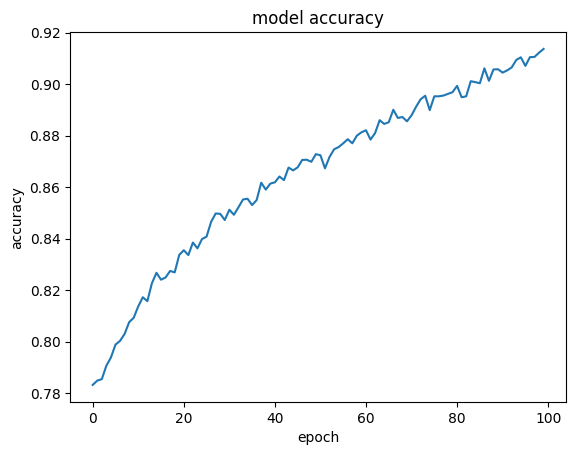

In [130]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt


def train_model(y_train, padded_sequences):
    # Erstellung des Modells
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(128, 5, activation='relu', input_shape=(1000,20)),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Kompilieren und Anpassen des Modells
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(padded_sequences, y_train, epochs=100)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')


    return model

model = train_model(y_train, padded_sequences)

In [288]:
model.save('20token1000words100epochs.keras')

In [97]:
model =tf.keras.models.load_model('20token1000words100epochs.keras')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 996, 128)          12928     
                                                                 
 global_average_pooling1d_4  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21249 (83.00 KB)
Trainable params: 21249 (83.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [13]:

import fasttext.util
import tensorflow as tf
import pandas as pd
import numpy as np
numpy_x_test = np.array(x_test)

# Initialisiere eine leere Liste für die gepaddeten Sequenzen und die Labels
padded_test_sequences = []
listofnonthousands =[]
labels = []
def text_to_sequences(tokenizer,text,i):
    
    splittext = str.split(text)
    if len(splittext)<1000:
        print(len(splittext),i)
        listofnonthousands.append(i)
        return []
    
    sequence = np.array([tokenizer.get_word_vector(word) for word in splittext])
    return sequence


# Iteriere über jeden Text in der DataFrame
for i,text in enumerate(numpy_x_test):
    
   
    # Konvertiere den Text in Sequenzen von Zahlen
    sequence = text_to_sequences(tokenizer,text[0],i) 
    
    
    padded_test_sequences.extend(sequence)
  
    
  


listofnonthousands




120 112
383 122
401 251
473 316
752 351
946 385
725 428
716 505
221 514
580 530
860 623
984 892
811 971
731 1265
120 1305
13 1313
170 1322
424 1346
150 1365
489 1434
310 1507
306 1584
673 1672
632 1769
397 1843
884 1901
831 1942
265 2075
246 2191
668 2201
761 2559
436 2582
662 2594
40 2612
232 2652
459 2700
747 2946
708 3124
132 3160
761 3357


[112,
 122,
 251,
 316,
 351,
 385,
 428,
 505,
 514,
 530,
 623,
 892,
 971,
 1265,
 1305,
 1313,
 1322,
 1346,
 1365,
 1434,
 1507,
 1584,
 1672,
 1769,
 1843,
 1901,
 1942,
 2075,
 2191,
 2201,
 2559,
 2582,
 2594,
 2612,
 2652,
 2700,
 2946,
 3124,
 3160,
 3357]

In [21]:
len(y_test)

3493

In [89]:

# Remove elements at specified indices
y_test = y_test.drop(y_test.index[listofnonthousands])
padded_test_sequences= filtered_list = [sublist for sublist in padded_test_sequences if sublist != []]



/var/folders/8s/p0s5_7hs56q6cx4vr8n1sqqc0000gn/T/ipykernel_855/3032388445.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  padded_test_sequences= filtered_list = [sublist for sublist in padded_sequences if sublist != []]


In [105]:
np.array(padded_sequences).shape

(3453, 1000, 20)

In [53]:
len(padded_test_sequences)
padded_test_sequences=np.array(padded_test_sequences).reshape(-1,1000,20)

In [54]:
padded_test_sequences.shape

(3453, 1000, 20)

In [73]:
test_preds = model.predict(padded_test_sequences)
test_preds,test_preds.shape,np.round(test_preds),np.sum(np.round(test_preds))
# So wuerde mann es manuell starten zu evaluaten, ist aber unnoetig wegen der evaluate function

108/108 [==============================] - 2s 17ms/step


(array([[1.4519099e-03],
        [7.9772726e-02],
        [2.7789210e-04],
        ...,
        [6.3254277e-04],
        [8.1408274e-01],
        [4.1283441e-01]], dtype=float32),
 (3453, 1),
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]], dtype=float32),
 559.0)

In [90]:

y_test



,Source
9945,0
9730,0
7682,0
6730,0
2526,0
...,...
6505,0
3044,0
12674,0
16536,1


In [107]:
model.evaluate(np.array(padded_test_sequences),y_test)


108/108 [==============================] - 2s 17ms/step - loss: 1.1381 - accuracy: 0.6939


[1.1381301879882812, 0.6938893795013428]

In [ ]:
model.evaluate(np.array(padded))

In [68]:
# def evaluate(test_preds,y_test):
#     for i in range(len(y_test)):
#         print(y_test[i]== test_preds[i])
#     # [test_preds[i]==y_test[i] for i in range(len(y_test))]
# evaluate(test_preds,y_test)

KeyError: 0